**Aula Prática** Coleta de Dados

##### Primeiro passo: Coletar os dados

Os dados foram obtidos pela plataforma [Kaggle](https://www.kaggle.com/datasets/sahideseker/wine-quality-classification).

Este conjunto de dados contém **1.000 amostras sintéticas de vinho**, cada uma descrita por quatro características químicas principais:  
- **Acidez fixa**  
- **Açúcar residual**  
- **Teor alcoólico**  
- **Densidade**  

Cada amostra é rotulada com uma **classe de qualidade do vinho** (**baixa, média ou alta**) com base em um sistema de pontuação de qualidade simulado.

Objetivo: **Classificação (predição)** da qualidade do vinho com base em suas características químicas.  
O intuito do modelo será prever se um vinho pertence à categoria **baixa, média ou alta qualidade**, ajudando na análise de padrões que influenciam a percepção da qualidade.

In [1]:
import pandas as pd

# Lendo o arquivo csv principal
df = pd.read_csv("../dados/dados_origem.csv")

# Vizualizando as primeiras linhas
df.head()

,fixed_acidity,residual_sugar,alcohol,density,quality_label
0,9.3,6.4,13.6,1.0005,high
1,11.2,2.0,14.0,0.9912,medium
2,11.6,0.9,8.2,0.9935,low
3,12.9,6.6,12.7,1.0002,low
4,13.9,13.8,10.4,0.9942,medium


Com base na descrição fornecida pelo autor, vou renomear as colunas para facilitar o entendimento.

1. fixed_acidity: Nível de acidez fixa
2. residual_sugar: Nível de açúcar após a fermentação
3. álcool: Teor alcoólico (%)
4. densidade: Densidade do líquido
5. rótulo_de_qualidade: Classe de qualidade do vinho (baixa / média / alta)

In [3]:
# Dicionário de mapeamento (inglês para português simplificado)
mapeamento_colunas = {
    'fixed_acidity': 'acidez_fixa',
    'residual_sugar': 'acucar_residual',
    'alcohol': 'alcool',
    'density': 'densidade',
    'quality_label': 'rotulo_qualidade'
}

# Renomeando as colunas
df = df.rename(columns=mapeamento_colunas)

# Verificando as colunas renomeadas
df.head()

,acidez_fixa,acucar_residual,alcool,densidade,rotulo_qualidade
0,9.3,6.4,13.6,1.0005,high
1,11.2,2.0,14.0,0.9912,medium
2,11.6,0.9,8.2,0.9935,low
3,12.9,6.6,12.7,1.0002,low
4,13.9,13.8,10.4,0.9942,medium


##### Primeiro passo: Fazer algumas análises

Existe dados faltantes na minha base de dados?

In [4]:
# Verificar se existe algum dado faltante
dados_faltantes = df.isna().sum()

# Exibir os dados faltantes
print("Dados faltantes por coluna:")
print(dados_faltantes)

Dados faltantes por coluna:
acidez_fixa         0
acucar_residual     0
alcool              0
densidade           0
rotulo_qualidade    0
dtype: int64


In [5]:
# Também podemos verificar os tipos de dados de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acidez_fixa       1000 non-null   float64
 1   acucar_residual   1000 non-null   float64
 2   alcool            1000 non-null   float64
 3   densidade         1000 non-null   float64
 4   rotulo_qualidade  1000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


**Quais são os níveis e a distribuição de acidez fixa presentes nos vinhos?**

- Vamos analisar a frequência de cada valor de acidez fixa na base de dados para entender melhor como essa característica está distribuída entre as amostras.

In [9]:
print("Distribuição dos níveis de acidez fixa:")
df['acidez_fixa'].value_counts()

Distribuição dos níveis de acidez fixa:


acidez_fixa
15.6    22
12.0    18
13.8    17
5.3     16
15.1    14
        ..
7.3      4
12.4     3
4.0      2
14.9     2
8.1      2
Name: count, Length: 121, dtype: int64

**Quais são os níveis e a distribuição de açúcar residual presentes nos vinhos?**

- Vamos analisar a frequência de cada valor de açúcar residual na base de dados para entender como essa característica está distribuída entre as amostras.

In [10]:
print("Distribuição dos níveis de açúcar residual:")
df['acucar_residual'].value_counts()

Distribuição dos níveis de açúcar residual:


acucar_residual
12.4    14
8.6     13
12.1    13
7.1     13
4.3     12
        ..
9.7      2
1.9      2
1.5      2
15.0     1
10.5     1
Name: count, Length: 145, dtype: int64

**Quais são os níveis e a distribuição de teor alcoólico presentes nos vinhos?**

- Vamos analisar a frequência de cada valor de teor alcoólico na base de dados para entender como essa característica está distribuída entre as amostras.

In [11]:
print("\nDistribuição dos níveis de teor alcoólico:")
df['alcool'].value_counts()


Distribuição dos níveis de teor alcoólico:


alcool
9.9     25
8.5     24
9.4     24
13.4    23
13.2    23
        ..
8.8     10
8.0      9
9.0      8
11.3     8
14.0     5
Name: count, Length: 61, dtype: int64

**Quais são os níveis e a distribuição de densidade presentes nos vinhos?**

- Vamos analisar a frequência de cada valor de densidade na base de dados para entender como essa característica está distribuída entre as amostras.

In [12]:
print("\nDistribuição dos níveis de densidade:")
df['densidade'].value_counts()


Distribuição dos níveis de densidade:


densidade
1.0007    13
1.0017    13
1.0035    13
0.9941    12
0.9945    11
          ..
0.9928     3
1.0030     2
0.9976     2
1.0016     1
1.0026     1
Name: count, Length: 151, dtype: int64

**Como está distribuída a classificação de qualidade dos vinhos?**

- Vamos analisar a frequência de cada classe de qualidade do vinho para entender a distribuição das categorias baixa, média e alta.

In [14]:
print("\nDistribuição das classes de qualidade do vinho:")
df['rotulo_qualidade'].value_counts()


Distribuição das classes de qualidade do vinho:


rotulo_qualidade
medium    355
high      343
low       302
Name: count, dtype: int64

##### Vamos calcular média das principais características químicas dos vinhos.

In [18]:
print("Média de acidez fixa:", df['acidez_fixa'].mean())

Média de acidez fixa: 10.174299999999999


In [16]:
print("Média de açúcar residual:", df['acucar_residual'].mean())

Média de açúcar residual: 7.692


In [17]:
print("Média de teor alcoólico:", df['alcool'].mean())

Média de teor alcoólico: 11.0399


In [19]:
print("Média de densidade:", df['densidade'].mean())

Média de densidade: 0.9975049


##### Gerando gráficos para análise dessas informações:

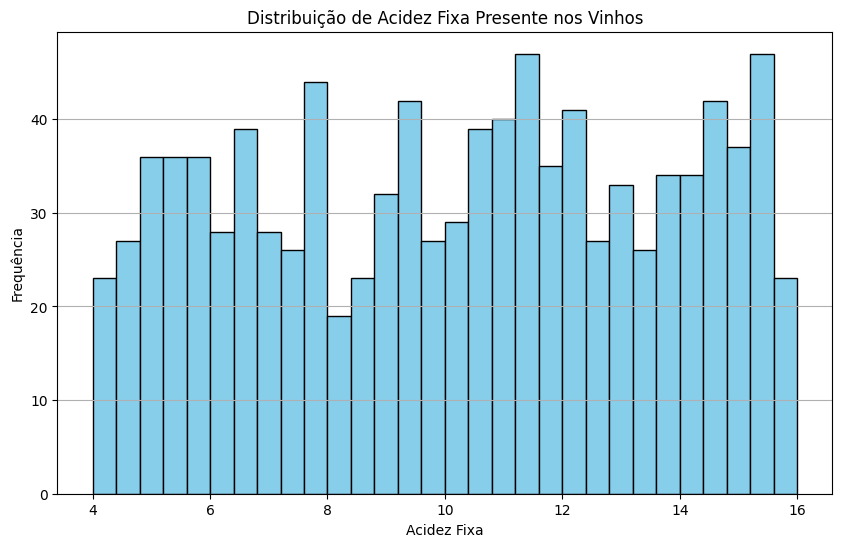

In [40]:
# Importando a biblioteca matplotlib para visualização
import matplotlib.pyplot as plt

# Criando a distribuição de acidez fixa com grafico de barras
plt.figure(figsize=(10, 6))
df['acidez_fixa'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição de Acidez Fixa Presente nos Vinhos')
plt.xlabel('Acidez Fixa')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()


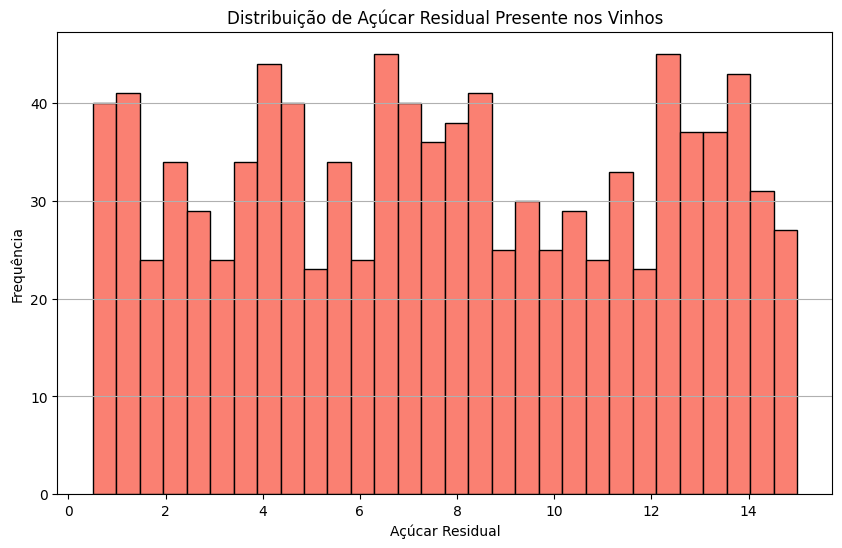

In [35]:
# Criando a distribuição de açúcar residual com gráfico de barras

plt.figure(figsize=(10, 6))
df['acucar_residual'].plot(kind='hist', bins=30, color='salmon', edgecolor='black')
plt.title('Distribuição de Açúcar Residual Presente nos Vinhos')
plt.xlabel('Açúcar Residual')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()


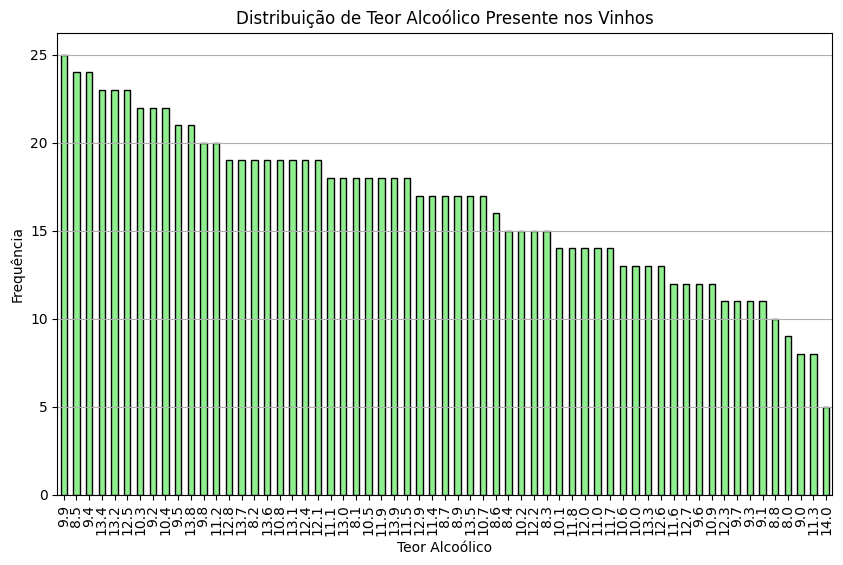

In [37]:
# Criando a distribuição de teor alcoólico em gráfico de barras

plt.figure(figsize=(10, 6))
df['alcool'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribuição de Teor Alcoólico Presente nos Vinhos')
plt.xlabel('Teor Alcoólico')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()


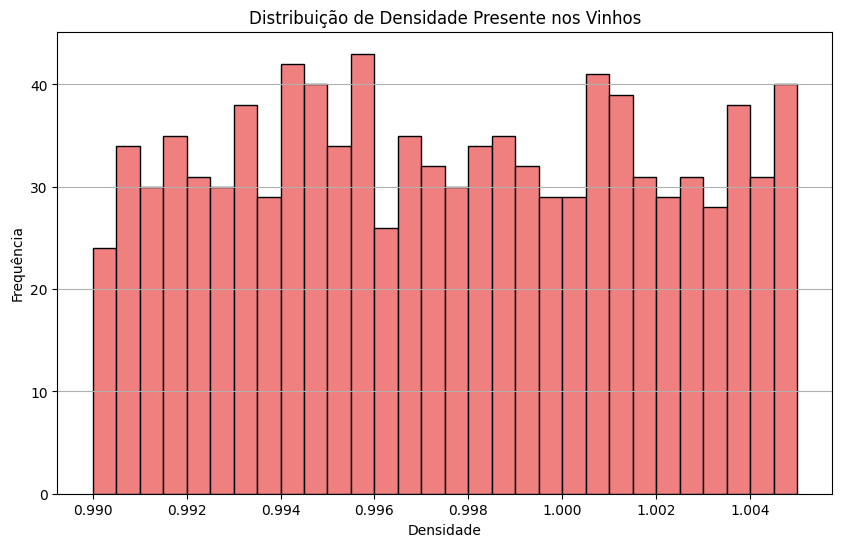

In [44]:
# Criando a distribuição de densidade em gráfico de barras
plt.figure(figsize=(10, 6))
df['densidade'].plot(kind='hist', bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribuição de Densidade Presente nos Vinhos')
plt.xlabel('Densidade')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()


**Importante!** Algumas variáveis são do tipo "object". Precisarmos fazer uma transformação para a representação numérica antes de executar uma técnica de Aprendizado de Máquina

In [45]:
# Importar método de tranformar automaticamente os dados
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['rotulo_qualidade'] = encoder.fit_transform(df['rotulo_qualidade'])

# Exemplo de como recuperar o mapeamento feito pelo método LabelEncoder()
mapeamento_formacao = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Mapeamento de 'Rótulos de qualidade':", mapeamento_formacao)

Mapeamento de 'Rótulos de qualidade': {'high': np.int64(0), 'low': np.int64(1), 'medium': np.int64(2)}


In [46]:
df.head()

,acidez_fixa,acucar_residual,alcool,densidade,rotulo_qualidade
0,9.3,6.4,13.6,1.0005,0
1,11.2,2.0,14.0,0.9912,2
2,11.6,0.9,8.2,0.9935,1
3,12.9,6.6,12.7,1.0002,1
4,13.9,13.8,10.4,0.9942,2


In [47]:
# Verificar se todas as variaveis são numéricas
df.dtypes

acidez_fixa         float64
acucar_residual     float64
alcool              float64
densidade           float64
rotulo_qualidade      int64
dtype: object

Agora irei salvar a base de dados limpa:

In [48]:
# Salvar o DataFrame transformado em um novo arquivo CSV
caminho_arquivo = '../dados/dados_transformados.csv'
df.to_csv(caminho_arquivo, index=False, encoding='utf-8-sig')

print(f"Arquivo transformado salvo em: {caminho_arquivo}")

Arquivo transformado salvo em: ../dados/dados_transformados.csv
